<a href="https://colab.research.google.com/github/SolbiChoi/TeamProject/blob/master/beauty_bad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy wordcloud

In [ ]:
import pandas as pd
from konlpy.tag import Okt, Komoran, Kkma, Hannanum, Twitter, Mecab
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')



In [ ]:
text = pd.read_excel('./beauty_scraping.xlsx')
grade_2 = text['star grade'] <= 2.0

df_grade2 = text[grade_2]
df_grade2['star grade'].value_counts()

df_grade2.head(10)


,star grade,review
18,1.0,담당자분들 너무 친절하셨고\n제품도 만족스러워 세번의 펀딩 모두 참여했는데\n새소식...
20,1.0,정말 과대광고네요...별로에요.\n포장상태 엉망이고 사진 올리고싶은데 사진은 못올리...
38,1.0,사내문제로 개발자들 다 해고하면 품질 유지 어떻게 하려하나요
39,1.0,왜 10명이나 되는 직원들을 한꺼번에 해고하셨나요?
51,2.0,너무 기대가 컸나봐요.\n발랐을때 약간 당기는 느낌 말고는 변화가 거의 없네요.\n...
54,1.0,기도를하면서 써도 끝까지 다썼는데 전~~~~혀 효과없음... 와다즈펀딩 앞으론 안할...
88,2.0,열심히쓰고 있는데 효과는 모르겠습니다
117,2.0,세 병 사서 두 달 가까이 썼는데 모공은 그대로고 오히려 코 주변 트러블만 생겼어요
298,1.0,제품 개선에 도움이 되길 바라며 정말 솔직하게 리뷰 남기겠습니다. 저는 어렸을때 부...
381,1.0,"그린토마토 앰플 수령하여 4회 정도 사용했을때,\n얼굴이 오히려 좀 붉어지는것같았지..."


In [ ]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]
def clean_text(x):
    for punct in puncts:
        x = x.replace(punct,' ')
    return x

text=clean_text(text)



In [ ]:
x_data = text['review']
y_data = text['star grade']

In [ ]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [ ]:
y_data = y_data.apply(lambda val:make_y_data(val))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6003,), (6003,), (2002,), (2002,))

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  36963      0 --:--:-- --:--:-- --:--:-- 36963


In [ ]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

1794                               로션 같고 발림성이 좋네요촉촉해서 좋아요
2766                               충전이 안되요 어떻게 수리받을수 있을까요
671     악건성  트러블로 엄청 고생하던 사람입니다토너로 피부가 좋아지는 걸 처음 경험해봤어...
4201    용기가 독특해서 한번 놀라고 사용감에 두번 놀라네요 용기가 부드러워서 제품 다 쓰고...
3102    열심히 쓰고 있는 중인데 아직까진 느낌 좋아요 일 배상제도도 있어서 믿고 쓰기 시작...
                              ...                        
7039                          샘플 써보고 개 쟁였습니다 향이 향수같아서 좋아요
7752                                    가격도 저렴하고 향도 너무좋아요
5925                                     바세린이랑 큰차이를 모르겠어요
5400    진짜 아이다 장난없네요ㅠㅠㅠ 어떻게 이런 쿠션을 만들었는지 진짜 채고채고 제가 초민...
2516    으음저만은 아니군요너무 기대감이 컸던 걸까요그냥 속눈썹 찜질한다 생각하고 천천히시도...
Name: review, Length: 6003, dtype: object

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [ ]:
import pickle
pickle.dump(stopwords, open('./stopwords.pkl','wb'))

LookupError: ignored

In [ ]:

sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

In [ ]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(sentence)

In [ ]:
tokenizer.word_index

In [ ]:
text=tokenizer.word_counts

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [ ]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(
font_path = './NanumGothicExtraBold.ttf', background_color='gray',
colormap = "hot", width=3000, height=2000).generate_from_frequencies(text)



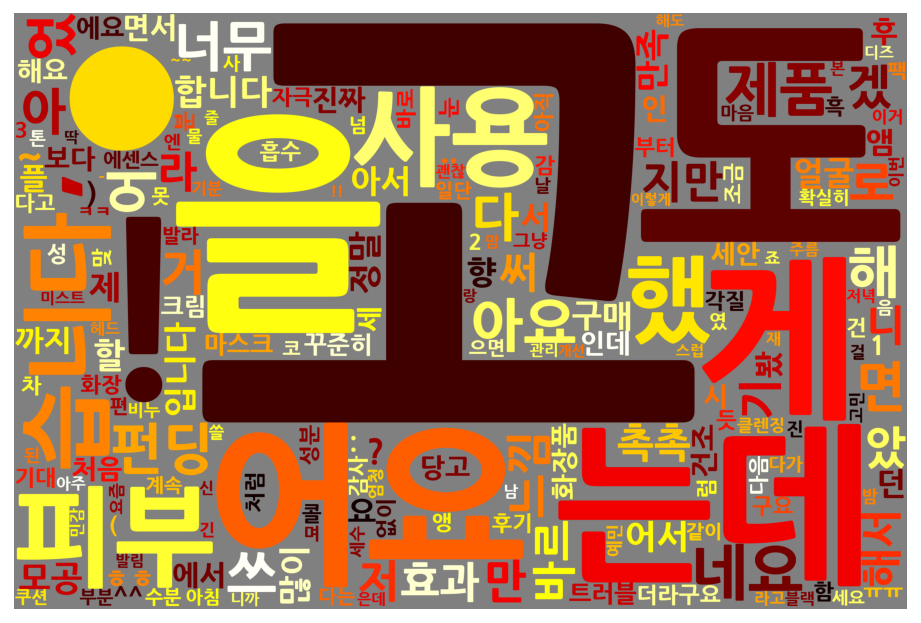

In [ ]:

plt.imshow(wordcloud) 

figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
plt.axis('off') 
plt.show()